In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data Insights 

In [2]:
ddd = pd.read_csv('./Heart_Disease.csv')
ddd.head()
# ddd.shape

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [813]:
# ddd.drop(['BPMeds'],axis=1,inplace=True)
ddd.head()


,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# print(ddd.currentSmoker.unique())
# print(ddd.cigsPerDay.unique())
# print(ddd.BPMeds.unique())
# print(ddd.age.values)
# print(ddd.diabetes.unique())
# print(ddd.prevalentStroke.unique())
# print(ddd.education.unique())
# print(ddd.BPMeds.unique())
for i in ddd.columns:
    print(f'{i}',ddd[f'{i}'].unique())

age [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
currentSmoker [0 1]
cigsPerDay [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds [ 0.  1. nan]
prevalentStroke [0 1]
prevalentHyp [0 1]
diabetes [0 1]
totChol [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176. 163. 191. 263. 196. 310. 164. 135. 238. 207. 34

In [5]:
print(ddd.shape)

(4238, 14)


In [13]:
ddd.isnull().sum()

age                0
currentSmoker      0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
ddd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4238 non-null   int64  
 1   currentSmoker    4238 non-null   int64  
 2   cigsPerDay       4209 non-null   float64
 3   BPMeds           4185 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   totChol          4188 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4219 non-null   float64
 11  heartRate        4237 non-null   float64
 12  glucose          3850 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 463.7 KB


# filled the missing value with mean 

In [8]:
cc = ['cigsPerDay','totChol','BMI','heartRate','glucose']
for i in cc:
    m = ddd[f'{i}'].mean()
    ddd[f'{i}'].fillna(m,inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_28824\1009169065.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ddd[f'{i}'].fillna(m,inplace=True)


In [11]:
# ddd.BPMeds.fillna(ddd.BPMeds.mode,inplace=True)
# ddd.BPMeds.mode()

0    0.0
Name: BPMeds, dtype: float64

In [14]:
ddd.isnull().sum()

age                0
currentSmoker      0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# finding outliers

<Axes: >

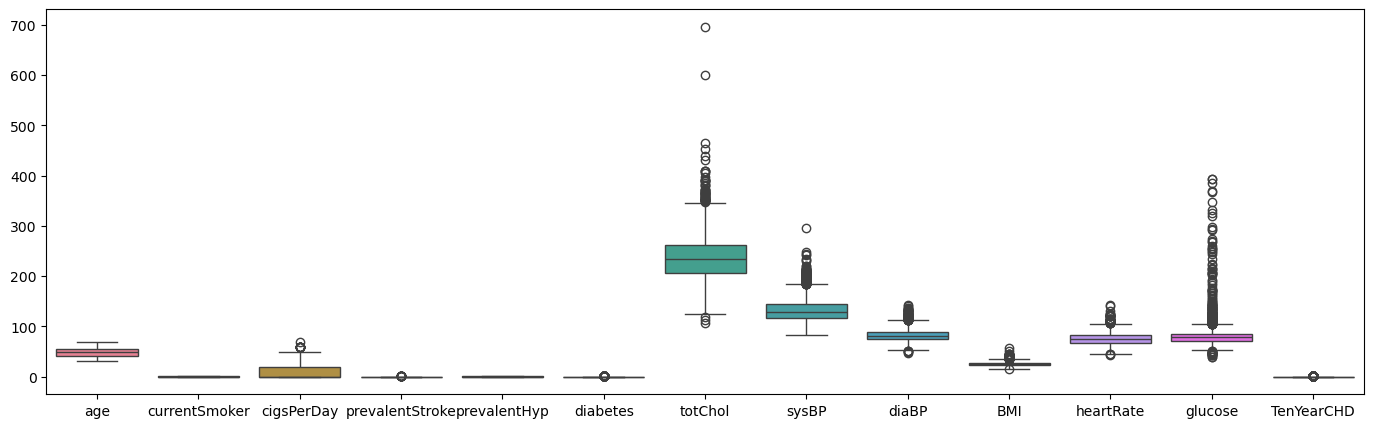

In [16]:
plt.figure(figsize=(17,5))
sns.boxplot(ddd)

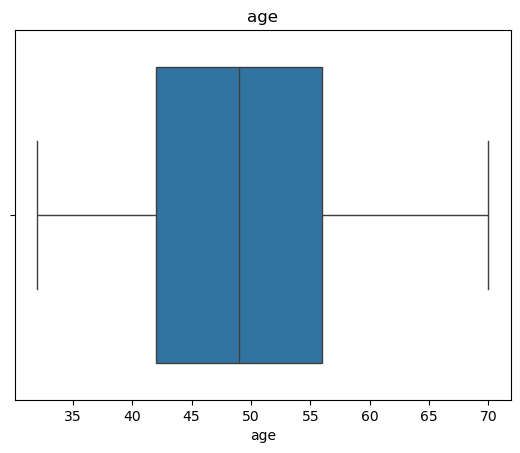

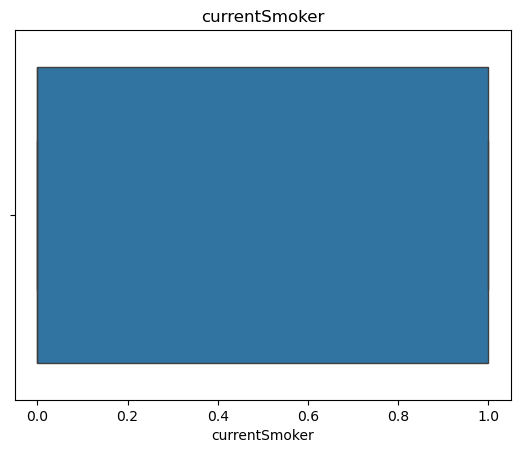

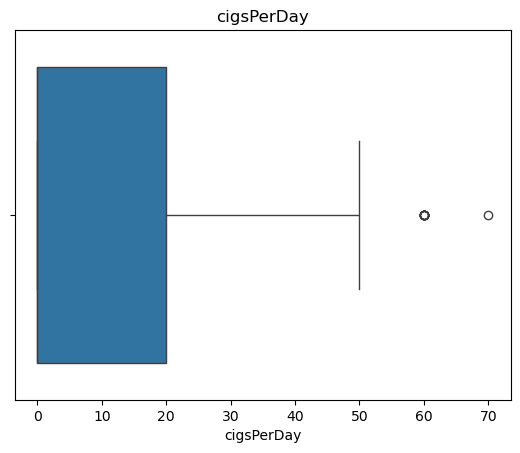

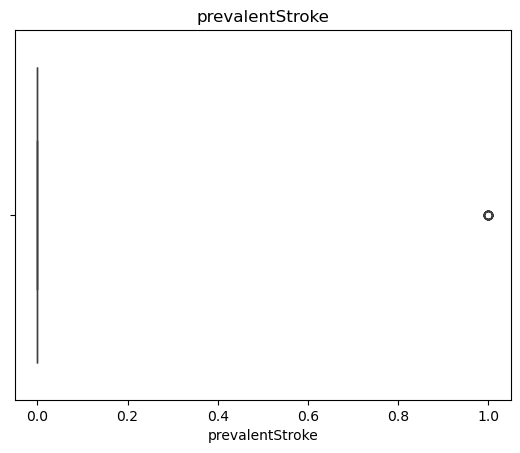

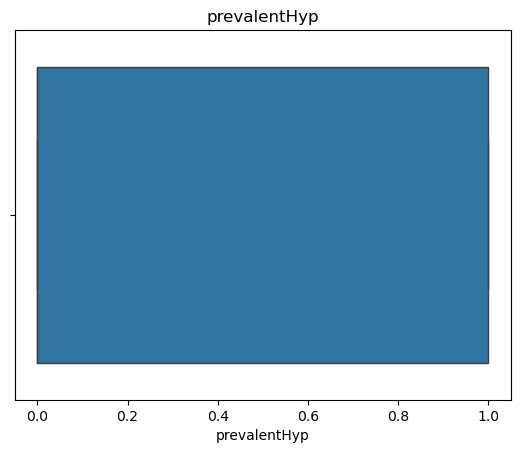

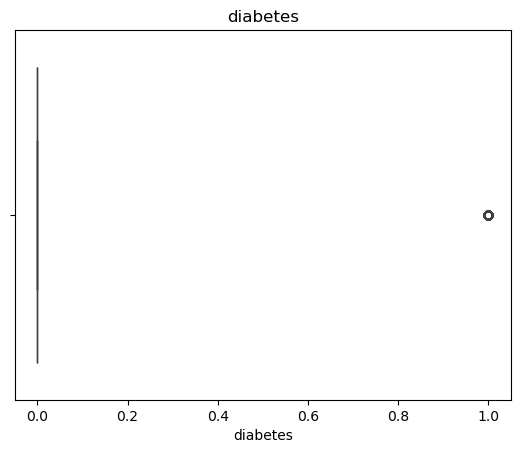

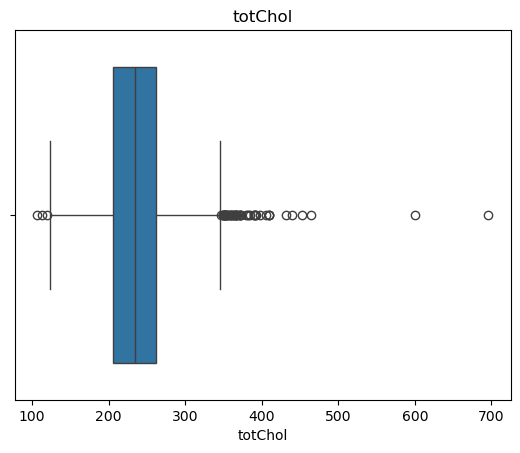

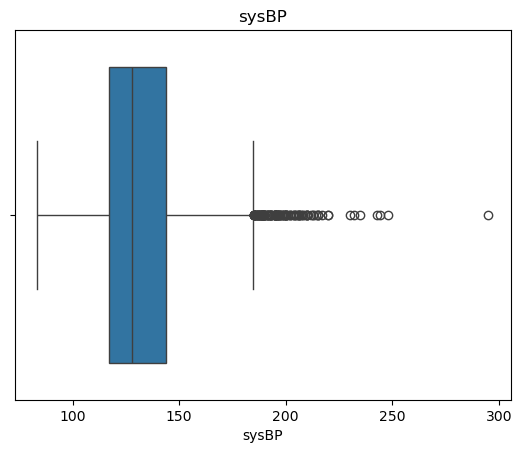

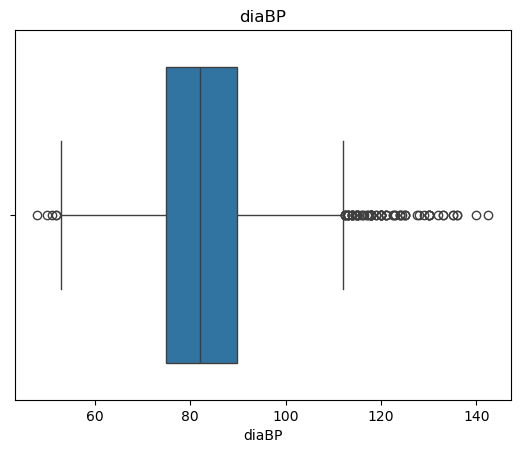

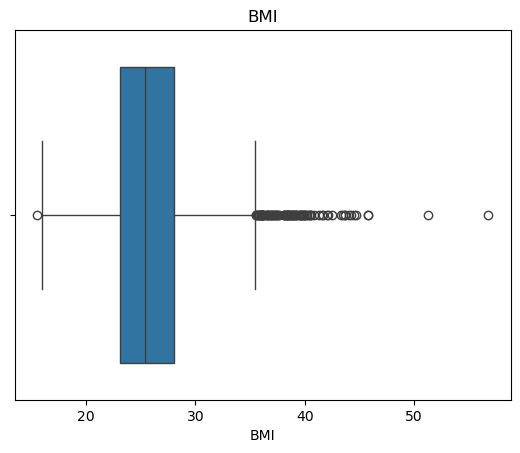

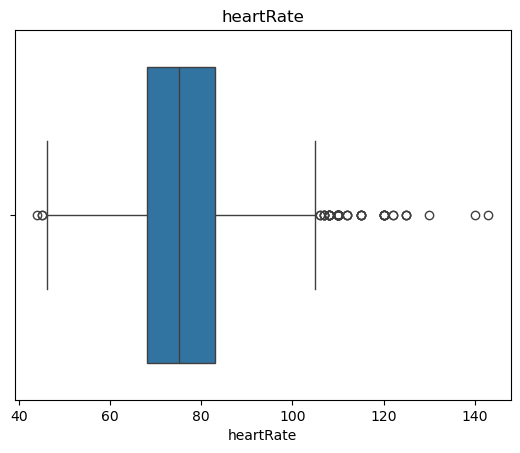

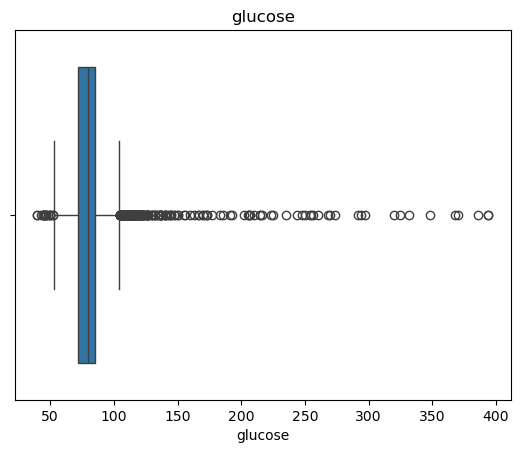

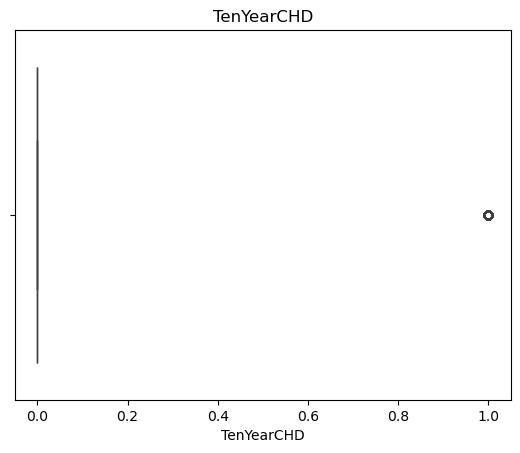

In [17]:
# plt.figure(figsize=(20,6))
for i in ddd.columns:
    sns.boxplot(data = ddd, x = i)
    plt.title(f'{i}')
    plt.show()

# replacing outliers

In [101]:
# removing outliers
o = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i in o:
    def iqr(s):
        upper=ddd[s].quantile(.75)
        lower=ddd[s].quantile(.25)
        iqr_radius = upper - lower
        upper_limit = upper + 1.5 * iqr_radius
        lower_limit = lower - 1.5 * iqr_radius
        print(f'The outliers of {s}:\n')
        dd = ddd[(ddd[s] > upper_limit) | (ddd[s] < lower_limit)]
        
        ddd[s] = np.where(
        ddd[s] > upper_limit, upper_limit,
        np.where(ddd[s] < lower_limit, lower_limit,
                ddd[s]))
        return dd
    print(iqr(f'{i}'))

The outliers of totChol:

      age  currentSmoker  cigsPerDay  prevalentStroke  prevalentHyp  diabetes  \
194    42              0    0.000000                0             0         0   
259    60              0    0.000000                0             1         0   
333    55              0    0.000000                0             1         0   
533    53              0    0.000000                0             0         0   
543    47              1   18.000000                0             1         0   
617    51              1    3.000000                0             1         0   
670    65              0    0.000000                0             0         0   
920    60              1   15.000000                0             0         0   
926    61              1   20.000000                0             1         0   
998    57              0    0.000000                0             0         0   
1103   60              1   20.000000                0             1         0   
11

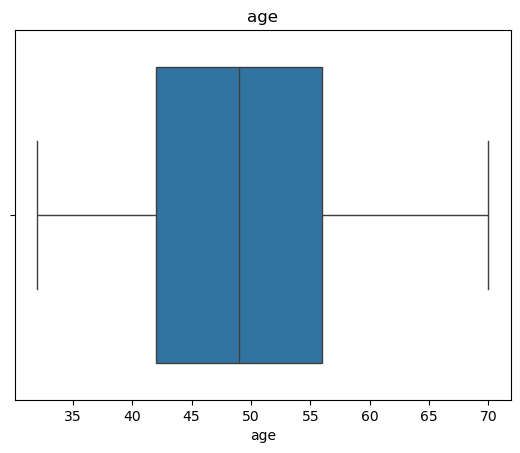

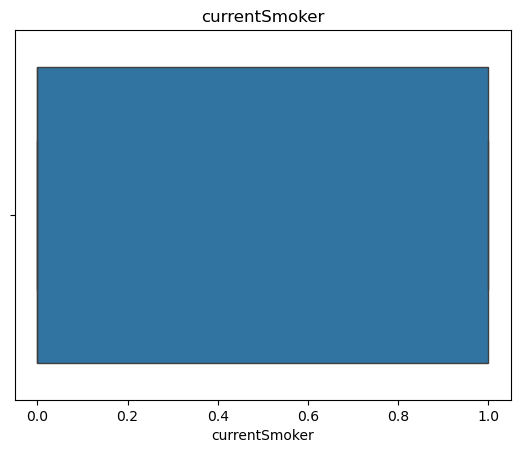

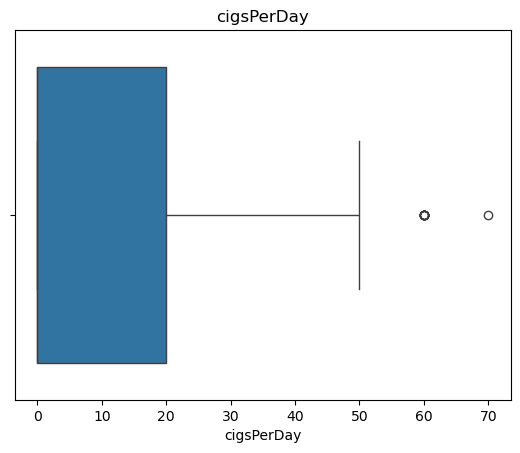

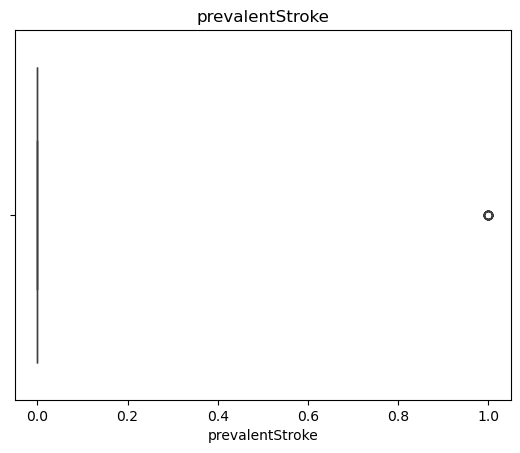

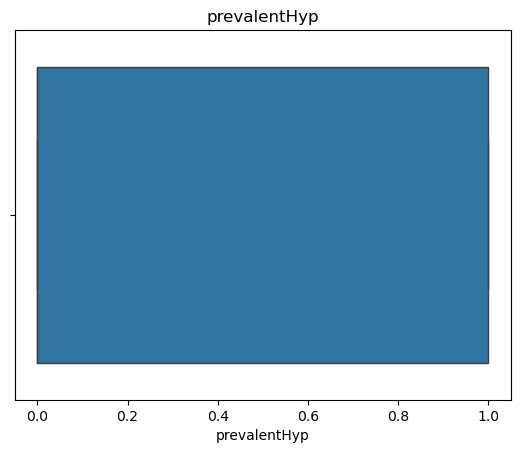

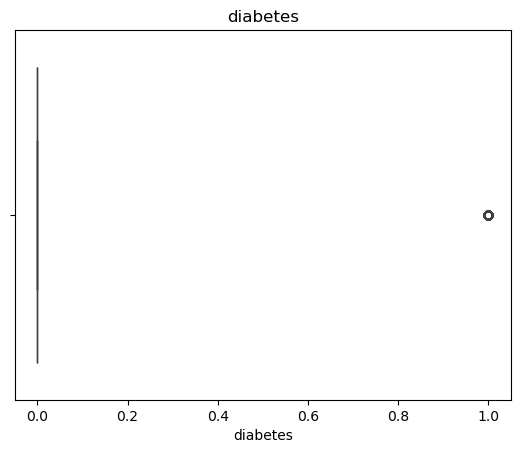

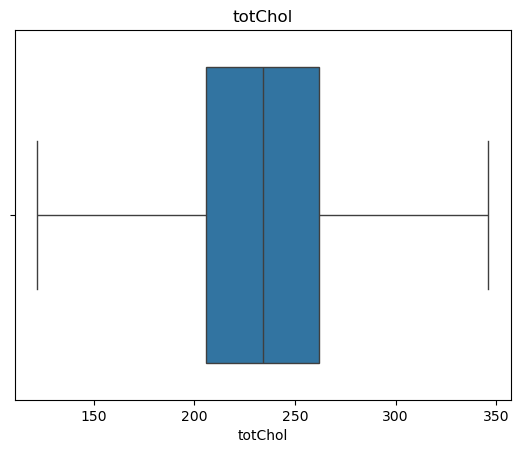

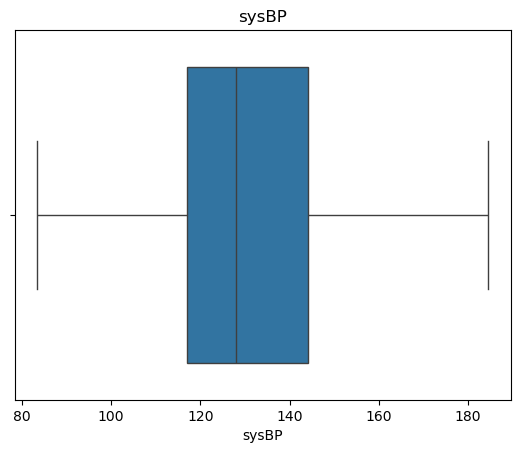

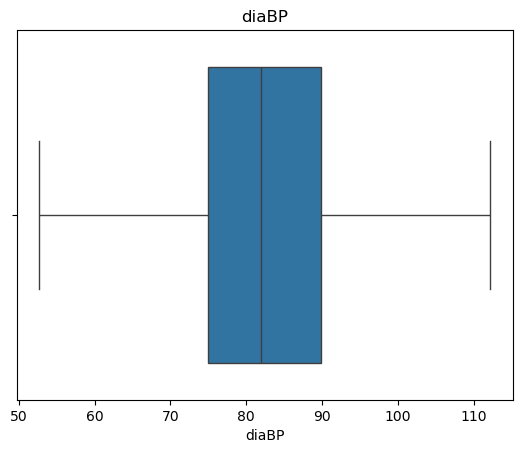

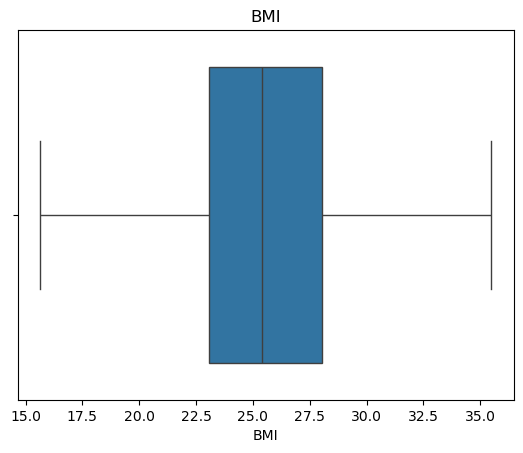

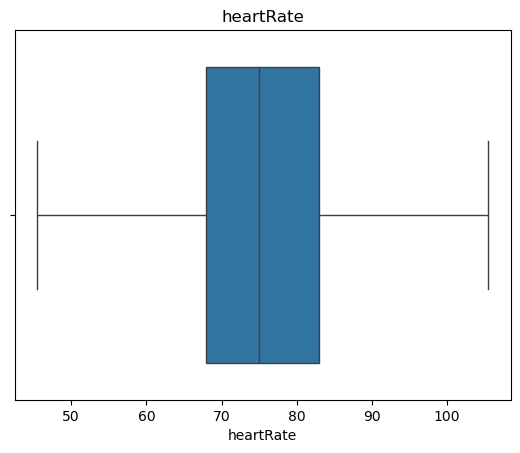

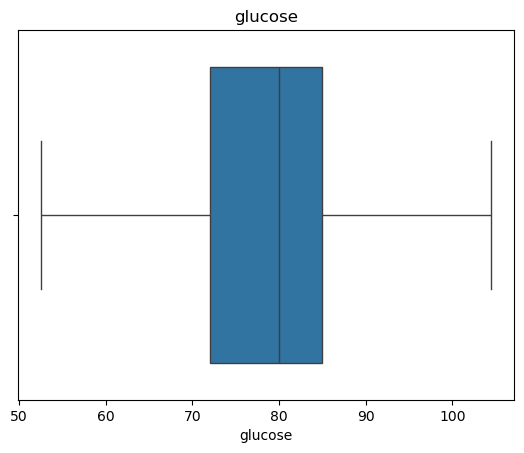

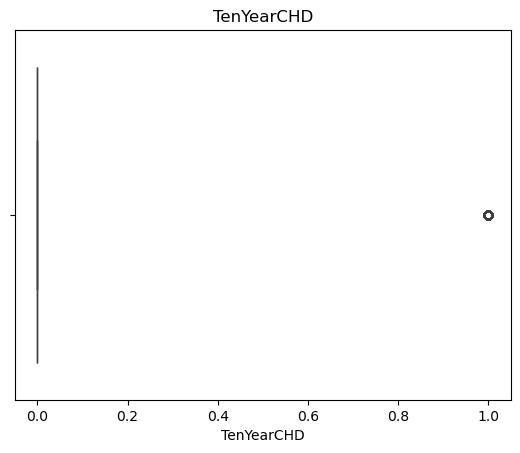

In [102]:
for i in ddd.columns:
    sns.boxplot(data = ddd, x = i)
    plt.title(f'{i}')
    plt.show()

# visualization 

age
32      1
33      5
34     18
35     42
36     84
37     92
38    144
39    169
40    191
41    174
42    180
43    159
44    166
45    162
46    182
47    141
48    173
49    132
50    140
51    146
52    149
53    139
54    132
55    145
56    123
57    123
58    117
59    119
60    111
61    110
62     99
63    110
64     93
65     57
66     38
67     45
68     18
69      7
70      2
Name: prevalentStroke, dtype: int64


<Axes: xlabel='age', ylabel='count'>

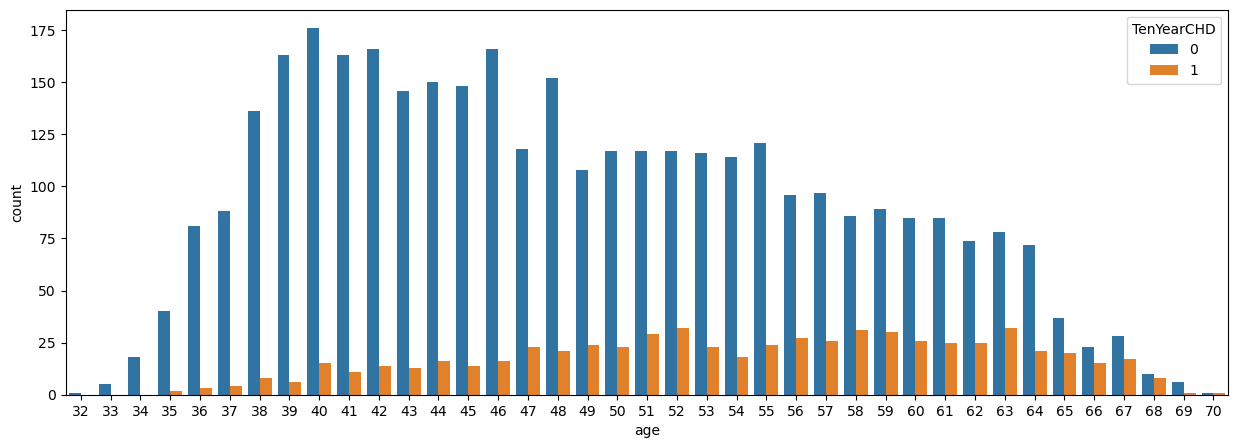

In [411]:
# plt.figure(figsize=(15,5))
c = ddd.groupby('age')['prevalentStroke']
print(c.count())
plt.figure(figsize=(15,5))
sns.countplot(x='age',hue='TenYearCHD',data=ddd)
# sns.countplot(x='totChol',hue='TenYearCHD',data=ddd)

<Axes: xlabel='age', ylabel='count'>

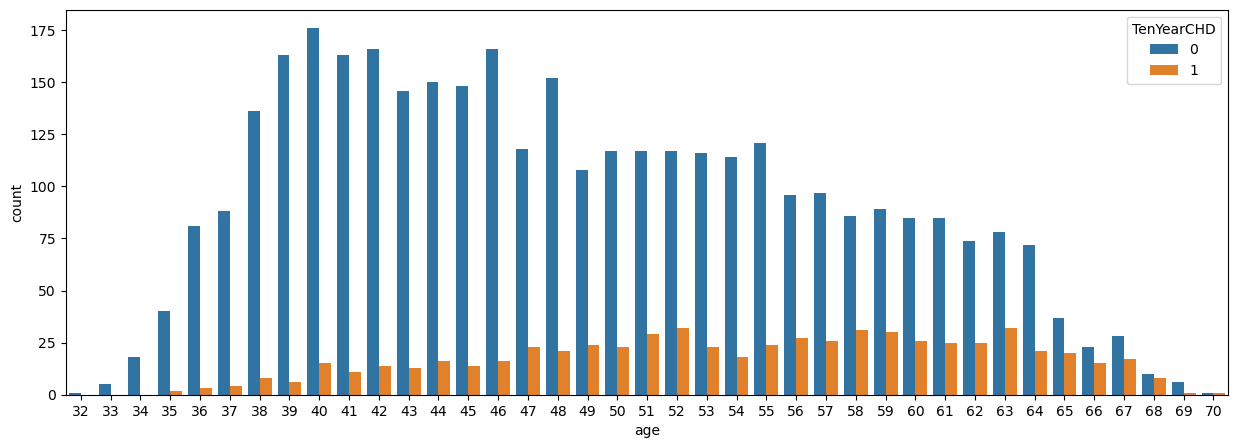

In [392]:
t = ddd.groupby('age')['TenYearCHD'].count()
plt.figure(figsize=(15,5))
sns.countplot(x='age',hue='TenYearCHD',data=ddd)

<Axes: xlabel='age', ylabel='count'>

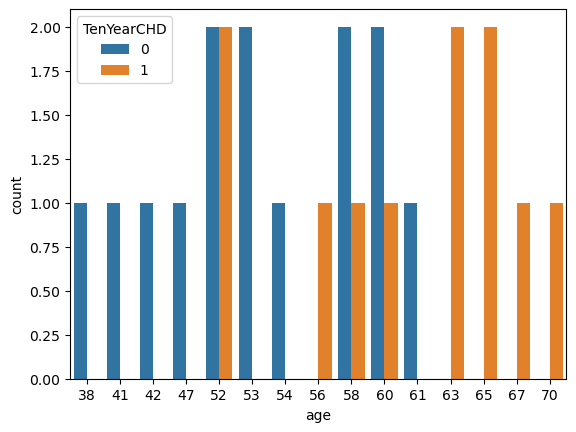

In [418]:
sns.countplot(x='age', hue='TenYearCHD', data=ddd[ddd['prevalentStroke'] == 1])

In [417]:
counts = ddd.groupby(['age', 'TenYearCHD'])['prevalentStroke'].count().reset_index()
counts

,age,TenYearCHD,prevalentStroke
0,32,0,1
1,33,0,5
2,34,0,18
3,35,0,40
4,35,1,2
...,...,...,...
70,68,1,8
71,69,0,6
72,69,1,1
73,70,0,1


In [1151]:
ddd.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

<Axes: xlabel='age', ylabel='TenYearCHD'>

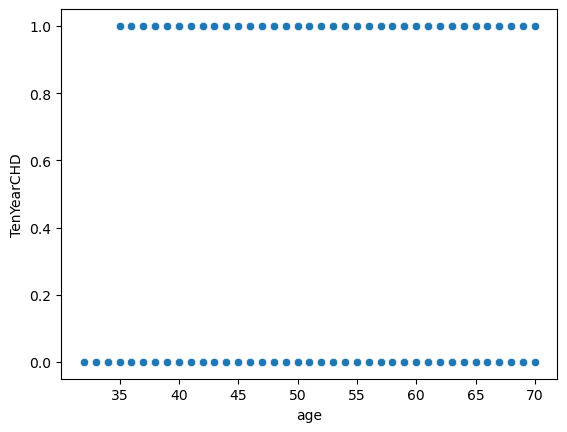

In [811]:
sns.scatterplot(x='age',y='TenYearCHD',data=ddd)

<Axes: >

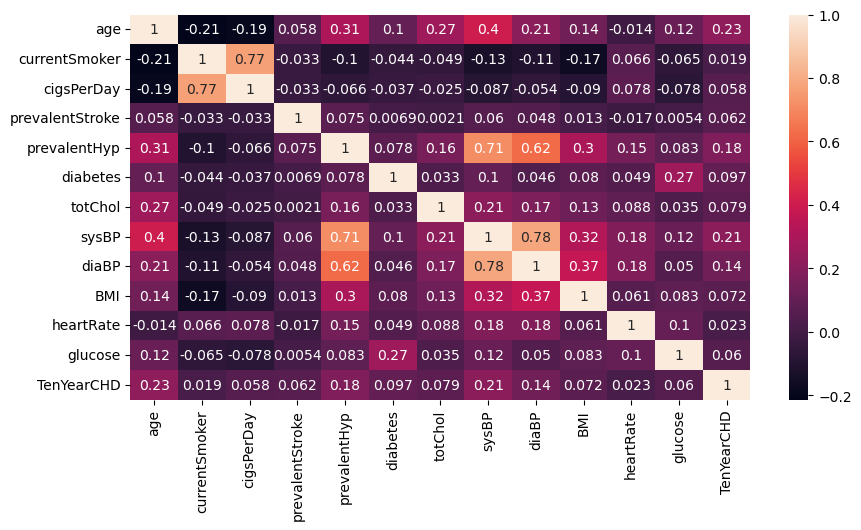

In [105]:
plt.figure(figsize=(10,5))
sns.heatmap(ddd.corr(),annot=True)

<Axes: xlabel='TenYearCHD', ylabel='heartRate'>

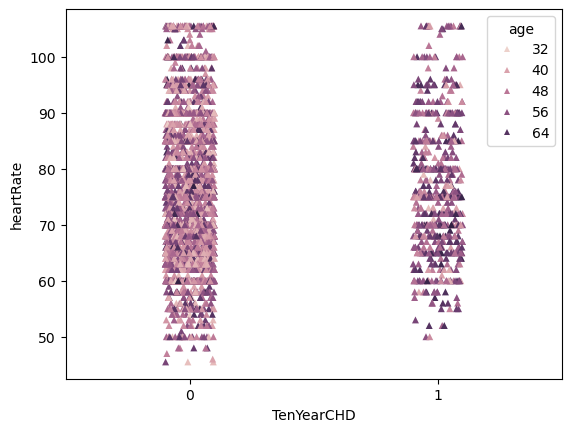

In [319]:
# sns.stripplot(x='TenYearCHD',y='heartRate',data=ddd,hue='age',marker='^')


In [106]:
ddd.pivot_table(index='heartRate',columns='TenYearCHD',values='age',aggfunc='mean')

TenYearCHD,0,1
heartRate,,
45.5,43.333333,NaN
46.0,40.000000,NaN
47.0,46.000000,NaN
48.0,53.800000,NaN
50.0,50.400000,50.000
...,...,...
102.0,45.500000,48.000
103.0,57.400000,NaN
104.0,48.000000,51.000


TenYearCHD
0    3594
1     644
Name: count, dtype: int64


<Axes: xlabel='TenYearCHD'>

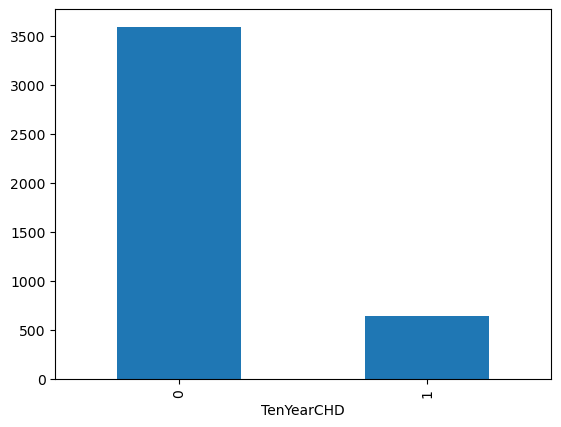

In [1158]:
print(ddd.TenYearCHD.value_counts())
ddd.TenYearCHD.value_counts().plot.bar()

In [503]:
ddd.age.value_counts()

age
40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: count, dtype: int64

<Axes: xlabel='age'>

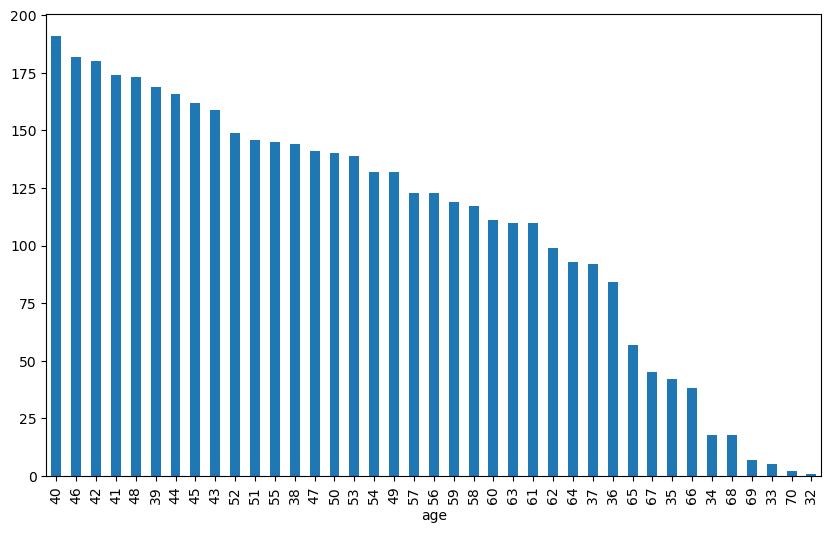

In [504]:
plt.figure(figsize=(10,6))
ddd.age.value_counts().plot.bar()

<Axes: xlabel='age'>

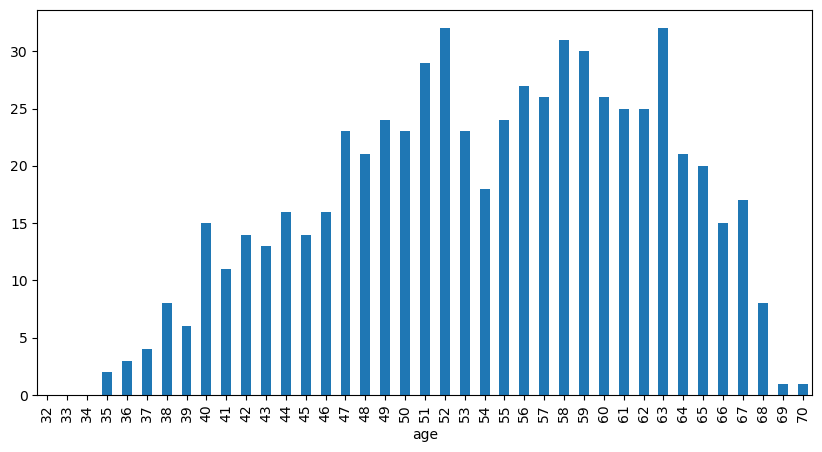

In [505]:
# ddd.TenYearCHD.value_counts()['age'].plot.bar()
# ddd[ddd['age'] == 40]['TenYearCHD'].plot.bar(color='blue')
plt.figure(figsize=(10,5))
v = ddd.groupby('age')['TenYearCHD'].sum().plot.bar()
v

# Dividing the data into input and target

In [103]:
cc = ddd.copy()

In [534]:
ddd.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [508]:
x = ddd.iloc[:,:-1]
x.head()

,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [728]:
y = ddd.iloc[:,-1:]
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4235,0
4236,0


# Scaling the data

In [511]:
e = x.copy()

In [439]:
from sklearn.preprocessing import StandardScaler

In [651]:
mms = StandardScaler()
x = mms.fit_transform(x)


In [652]:
ddd.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [653]:
x = pd.DataFrame(x,columns=['age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',])
x

,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234951,-0.988271,-0.757974,-0.077033,-0.671101,-0.162477,-0.974747,-1.255196,-1.118089,0.330699,0.365617,-0.245553
1,-0.418257,-0.988271,-0.757974,-0.077033,-0.671101,-0.162477,0.325744,-0.528621,-0.152197,0.795304,1.656274,-0.332775
2,-0.184916,1.011868,0.925835,-0.077033,-0.671101,-0.162477,0.207518,-0.213772,-0.240006,-0.099589,-0.064601,-0.856106
3,1.331800,1.011868,1.767740,-0.077033,1.490089,-0.162477,-0.265388,0.876090,1.077119,0.755707,-0.925039,2.022215
4,-0.418257,1.011868,1.178407,-0.077033,-0.671101,-0.162477,1.153330,-0.092676,0.111228,-0.690905,0.795836,0.452222
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.048425,1.011868,-0.673784,-0.077033,1.490089,-0.162477,1.815398,2.280801,0.813694,0.066719,-0.838995,0.539444
4234,0.165095,1.011868,2.862216,-0.077033,-0.671101,-0.162477,-0.691003,-0.262210,-0.240006,-1.585798,-0.925039,-1.030549
4235,-0.184916,1.011868,0.925835,-0.077033,-0.671101,-0.162477,0.278454,-0.044238,-0.942473,-0.981283,0.709792,0.539444
4236,-0.651598,1.011868,0.504883,-0.077033,-0.671101,-0.162477,-0.620067,-0.262210,0.374653,-1.730987,0.881880,0.187657


# train test split

In [729]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [730]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5) 

In [731]:
# ss = StandardScaler()

In [732]:
# x_train_scale = ss.fit_transform(x_train)
# x_test_scale = ss.transform(x_test)

In [733]:
# x_train_scale

In [734]:
# x_test_scale

In [735]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 12)
(848, 12)
(3390, 1)
(848, 1)


In [736]:
x_train.head()

,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3571,0.398436,-0.988271,-0.757974,-0.077033,1.490089,-0.162477,2.595693,0.779213,0.462461,1.795790,0.795836,0.187657
1341,0.281766,1.011868,1.346788,-0.077033,-0.671101,-0.162477,0.822296,-0.528621,-0.854664,-1.020880,-0.494820,0.539444
3413,-0.651598,-0.988271,-0.757974,-0.077033,1.490089,-0.162477,-0.170807,0.488583,0.813694,-0.133906,-0.322733,-0.332775
2083,1.448470,-0.988271,-0.757974,-0.077033,1.490089,-0.162477,1.697172,0.972967,1.340544,2.561332,-0.064601,-0.332775
517,-0.768269,1.011868,0.925835,-0.077033,1.490089,-0.162477,0.160227,1.118281,1.516161,-0.218380,0.365617,-1.466659


In [737]:
x_test.head()

,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1856,1.331800,-0.988271,-0.757974,-0.077033,1.490089,-0.162477,-0.761939,-0.577059,-1.381514,-0.231579,-1.097126,-0.419996
2370,1.215129,-0.988271,-0.757974,-0.077033,1.490089,-0.162477,-0.572777,0.682337,-0.240006,0.742508,1.656274,-0.681662
424,-1.351621,1.011868,0.504883,-0.077033,-0.671101,-0.162477,-1.424007,-1.061442,-0.240006,-0.445403,2.086492,2.153048
1736,-1.351621,1.011868,0.925835,-0.077033,-0.671101,-0.162477,1.011458,-0.383306,0.374653,0.254145,0.021442,-0.419996
1183,0.865118,-0.988271,-0.757974,-0.077033,1.490089,-0.162477,-0.076226,2.522992,2.043011,2.575521,-0.838995,-2.382488


In [738]:
y_train.head()

,TenYearCHD
3571,0
1341,1
3413,0
2083,0
517,0


In [739]:
y_test.head()

,TenYearCHD
1856,0
2370,1
424,0
1736,0
1183,1


# Logistic model

In [740]:
from sklearn.linear_model import LogisticRegression

In [741]:
lgr = LogisticRegression(solver='liblinear',C=1.0,multi_class='ovr')#,class_weight='balanced')
lgr

LogisticRegression(multi_class='ovr', solver='liblinear')

In [742]:
lgr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [743]:
predict = lgr.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [744]:
lgr.score(x_train,y_train)

0.8548672566371681

In [745]:
lgr.coef_

array([[ 0.55082923,  0.04284789,  0.28303333,  0.08381482,  0.10426525,
         0.10742936,  0.03787201,  0.27055036, -0.00710589,  0.02416732,
        -0.01728634,  0.08120215]])

In [746]:
lgr.classes_

array([0, 1], dtype=int64)

In [747]:
lgr.intercept_

array([-1.98262184])

In [748]:
lgr.predict_proba(x_test.iloc[1,:].values.reshape(1,-1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.79251236, 0.20748764]])

In [749]:
lgr.predict(x_test.iloc[1,:].values.reshape(1,-1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [750]:
from sklearn.metrics import accuracy_score

In [751]:
accuracy_score(y_test,lgr.predict(x_test))

0.8372641509433962

In [752]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, lgr.predict(x_test))
cm

array([[701,   1],
       [137,   9]], dtype=int64)

<Axes: >

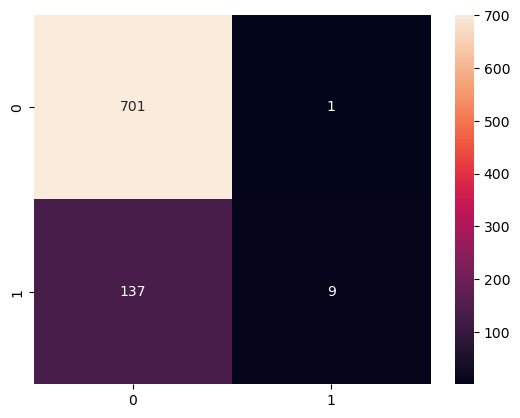

In [753]:
sns.heatmap(cm,annot=True,fmt='d')

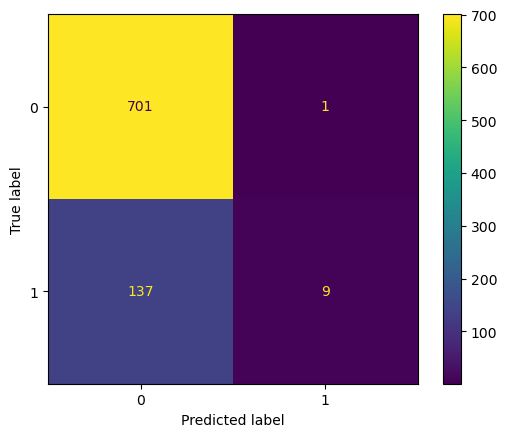

In [754]:
ConfusionMatrixDisplay(cm).plot()

In [755]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [756]:
print(precision_score(y_test,lgr.predict(x_test)))
print(recall_score(y_test,lgr.predict(x_test)))
print(f1_score(y_test,lgr.predict(x_test)))

0.9
0.06164383561643835
0.11538461538461539


In [757]:
y_test.shape

(848, 1)

In [758]:
predict.shape

(848,)

In [759]:
# df1=pd.DataFrame({"Actual":y_test,"Trained":predict})
# df1

# model on sample data

In [781]:
xx = e[['age','totChol']]
xx

,age,totChol
0,39,195.0
1,46,250.0
2,48,245.0
3,61,225.0
4,46,285.0
...,...,...
4233,50,313.0
4234,51,207.0
4235,48,248.0
4236,44,210.0


In [782]:
yy = ddd['TenYearCHD']
yy

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [796]:
xxtrain,xxtest,yytrain,yytest = train_test_split(xx,yy,test_size=0.2,random_state=5)

In [797]:
lgr2 = LogisticRegression(solver='liblinear',C=1.0,multi_class='ovr',class_weight='balanced')

In [798]:
lgr2.fit(xxtrain,yytrain)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [799]:
p = lgr2.predict(xxtest)
p

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [800]:
lgr2.score(xxtrain,yytrain)

0.623598820058997

In [801]:
accuracy_score(yytest,p)

0.6356132075471698

In [802]:
print(precision_score(yytest,p))
print(recall_score(yytest,p))
print(f1_score(yytest,p))

0.2678062678062678
0.6438356164383562
0.3782696177062374


In [803]:
m = confusion_matrix(yytest,p)
m

array([[445, 257],
       [ 52,  94]], dtype=int64)

In [804]:
sc = StandardScaler()
xx_train = sc.fit_transform(xxtrain)
# yy_train = sc.fit_transform(yytrain)
xx_test = sc.transform(xxtest)

In [805]:
xx_train

array([[ 0.4051233 ,  2.59118299],
       [ 0.28795173,  0.81312577],
       [-0.64942085, -0.18258627],
       ...,
       [ 1.45966745,  0.55234405],
       [ 0.63946645,  1.0739075 ],
       [ 0.28795173,  0.62346634]])

# Visualization of training and testing

In [806]:
from matplotlib.colors import ListedColormap
X_1, y_1, = xx_train, yytrain
def plot(X_1,y_1,mset):
    
  X1, X2 = np.meshgrid(np.arange(start = X_1[:, 0].min() - 1, stop = X_1[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_1[:, 1].min() - 1, stop = X_1[:, 1].max() + 1, step = 0.01))
  
  # print(X1)
  # print(X2)
    
  plt.contourf(X1, X2, lgr2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#ffff99', 'yellow')))
    
  # plt.plot(X1,X2,color='black',linewidth=2)
    
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
    
  for i, j in enumerate(np.unique(y_1)):
    #print(i,j)
    plt.scatter(X_1[y_1 == j, 0], X_1[y_1 == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("Logistic regression("+mset+")")
    plt.xlabel('Age')
    plt.ylabel('totChol')
    plt.legend()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\bhara\AppData\Local\Temp\ipykernel_28824\2994179805.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_1[y_1 == j, 0], X_1[y_1 == j, 1],


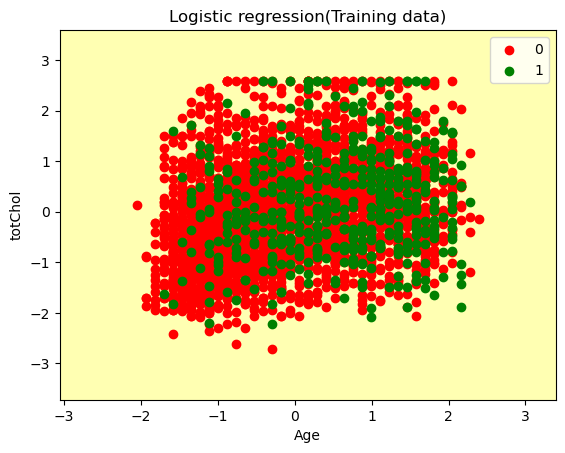

In [807]:
plt.show(plot(X_1,y_1,"Training data"))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\bhara\AppData\Local\Temp\ipykernel_28824\3662918825.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


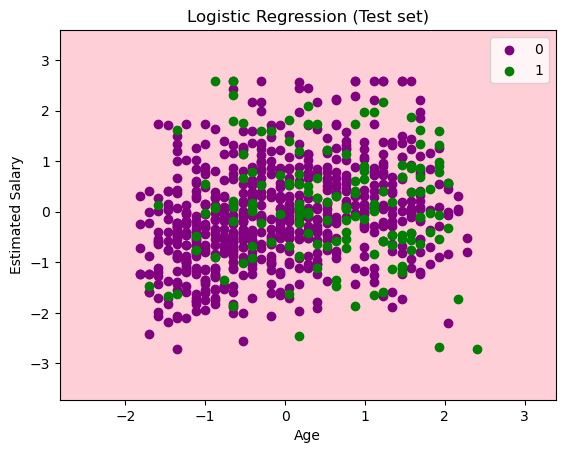

In [808]:
from matplotlib.colors import ListedColormap  
x_set, y_set = xx_test, yytest  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, lgr2.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('pink','yellow' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()